In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
import time
import numpy as np
import glob
import re
import random
import torch

sys.path.insert(0, '/Data/user/panhailin/code/git_lab/npspy/')
import npspy as nps
from npspy import npsc

In [2]:
sim = 'sim1'

In [3]:
for iteration in range(1,4):
    npsc.clean_ref_obj_by_ae_and_save(
        obj=f'../../03.results/simulation/{sim}/{sim}.pkl',
        fit_name=f'{sim}_iter{iteration}',
        output_save_dir=f'../../03.results/simulation/{sim}/iter{iteration}',
        save_reconstruction=False,
        max_iteration=iteration,
        epochs=20,
    )

Iteration 1/1 for training ShapeAwareAutoencoder...
Model ShapeAwareAutoencoder has total parameter number: 1.02 M
Epoch   0 / 20 train_loss: 0.016221 | val_loss: 0.001639 | lr: 0.001
Epoch   1 / 20 train_loss: 0.001580 | val_loss: 0.001770 | lr: 0.001
Epoch   2 / 20 train_loss: 0.001291 | val_loss: 0.001128 | lr: 0.001
Epoch   3 / 20 train_loss: 0.001231 | val_loss: 0.001242 | lr: 0.001
Epoch   4 / 20 train_loss: 0.001016 | val_loss: 0.001438 | lr: 0.001
Epoch   5 / 20 train_loss: 0.000968 | val_loss: 0.002061 | lr: 0.001
Epoch   6 / 20 train_loss: 0.000863 | val_loss: 0.001003 | lr: 0.001
Epoch   7 / 20 train_loss: 0.000897 | val_loss: 0.001754 | lr: 0.001
Epoch   8 / 20 train_loss: 0.000880 | val_loss: 0.000761 | lr: 0.001
Epoch   9 / 20 train_loss: 0.000866 | val_loss: 0.000969 | lr: 0.001
Epoch  10 / 20 train_loss: 0.000790 | val_loss: 0.001127 | lr: 0.001
Epoch  11 / 20 train_loss: 0.000738 | val_loss: 0.000620 | lr: 0.001
Epoch  12 / 20 train_loss: 0.000750 | val_loss: 0.000734 

In [4]:
cm_dfs_dict = {}
for iteration in range(1,4):
    cm_df = npsc.get_cm_from_errors_for_sim(f'../../03.results/simulation/{sim}/iter{iteration}/{sim}_iter{iteration}_error.csv')
    cm_dfs_dict[iteration] = cm_df
cm_dfs_dict

{1: pred    target  noise
 true                 
 target   18000      0
 noise        0   2000,
 2: pred    target  noise
 true                 
 target   17999      1
 noise        1   1999,
 3: pred    target  noise
 true                 
 target   17999      1
 noise        1   1999}

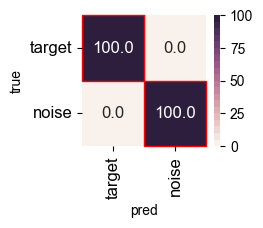

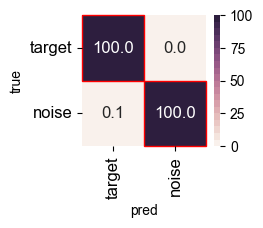

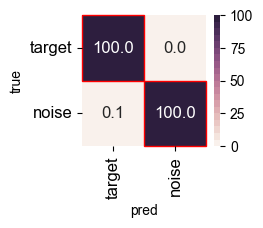

In [5]:
for iteration, cm_df in cm_dfs_dict.items():
    nps.ml.plot_cm(cm_df, figsize=(2, 1.7), annot_size=12.0)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(f"../../05.figures/simulation/{sim}/{sim}_iter{iteration}_cm.pdf", bbox_inches='tight')

In [6]:
metrics_dfs = []
for iteration in range(1,4):
    metrics_df = npsc.get_metrics_from_errors_for_sim(f'../../03.results/simulation/{sim}/iter{iteration}/{sim}_iter{iteration}_error.csv')
    metrics_df.index = [f'iter{iteration}']
    metrics_dfs.append(metrics_df)
metrics_dfs = pd.concat(metrics_dfs)
metrics_dfs

,accuracy,precision,recall,f1_score,jaccard_score
iter1,1.0000,1.000000,1.000000,1.000000,1.000000
iter2,0.9999,0.999722,0.999722,0.999722,0.999445
iter3,0.9999,0.999722,0.999722,0.999722,0.999445


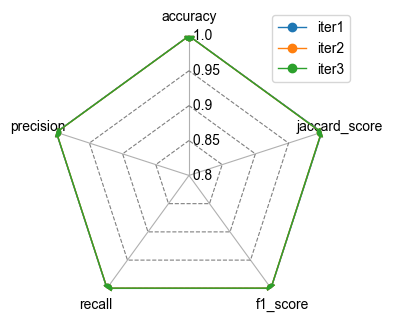

In [7]:
npsc.draw_radar_plot(metrics_dfs, y_min=0.8, legned_ncol=1, figsize=(4,4), y_tick_num=4,)
plt.savefig(f'../../05.figures/simulation/{sim}/{sim}_radar_plot.pdf', bbox_inches='tight')